In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# use seaborn plotting defaults
import seaborn as sns; sns.set()

In [2]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


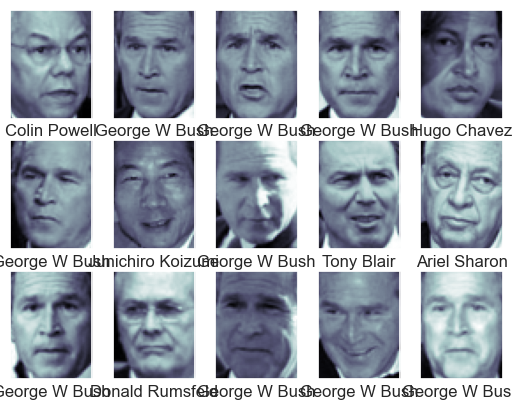

In [3]:
#Lets plot few of them:
fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

Each image contains [62×47] or nearly 3,000 pixels. We could proceed by simply using each pixel value as a feature, but often it is more effective to use some sort of preprocessor to extract more meaningful features; here we will use a principal component analysis to extract 150 fundamental components to feed into our support vector machine classifier. We can do this most straightforwardly by packaging the preprocessor and the classifier into a single pipeline:

In [21]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
svc = SVC(kernel='rbf')
tree=DecisionTreeClassifier(criterion="entropy", max_depth=13)
model1 = svc
model2 = tree

In [22]:
#Splitting the Training-Testing Data:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target)

In [23]:
model1.fit(Xtrain,ytrain)
model2.fit(Xtrain,ytrain)

DecisionTreeClassifier(criterion='entropy', max_depth=13)

In [24]:
yfit1 = model1.predict(Xtest)
yfit2 = model2.predict(Xtest)

In [25]:
#Lets look on classification report:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit1, target_names=faces.target_names))
print(classification_report(ytest, yfit2, target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       1.00      0.58      0.74        12
     Colin Powell       0.77      0.73      0.75        60
  Donald Rumsfeld       0.82      0.40      0.54        35
    George W Bush       0.61      0.97      0.75       127
Gerhard Schroeder       0.87      0.39      0.54        33
      Hugo Chavez       1.00      0.25      0.40        12
Junichiro Koizumi       1.00      0.71      0.83        14
       Tony Blair       0.79      0.50      0.61        44

         accuracy                           0.70       337
        macro avg       0.86      0.57      0.65       337
     weighted avg       0.75      0.70      0.68       337

                   precision    recall  f1-score   support

     Ariel Sharon       0.36      0.42      0.38        12
     Colin Powell       0.35      0.28      0.31        60
  Donald Rumsfeld       0.30      0.20      0.24        35
    George W Bush       0.51      0.60      0.55    

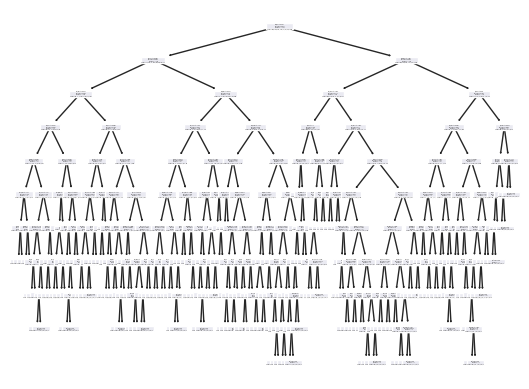

In [20]:
#Plotting Tree
import matplotlib.pyplot as plt
from sklearn import tree
tree.plot_tree(model2)
plt.show()